In [36]:
import scanpy as sc
import pandas as pd
from matplotlib.pyplot import rc_context
import anndata
import os
import numpy as np
from datetime import date
import gc
import scipy

In [37]:
## this data is downloaded from a database called cellxgene, for the same study
## https://cellxgene.cziscience.com/collections/ae1420fe-6630-46ed-8b3d-cc6056a66467
## An integrated transcriptomic and epigenomic atlas of mouse primary motor cortex cell types: 10X_nuclei_v3_Broad

In [ ]:
mouse = sc.read_h5ad("mouse_from_cellgene.h5ad")

In [16]:
mouse

AnnData object with n_obs × n_vars = 159738 × 30639
    obs: 'Unnamed: 0', 'nUMI', 'nGene', 'QC', 'cluster', 'Allen.cluster_id', 'Allen.cluster_label', 'Allen.class_label', 'Allen.subclass_label', 'comb.QC', 'row', 'BICCN_cluster_id', 'BICCN_cluster_label', 'BICCN_class_label', 'BICCN_subclass_label', 'size', 'gene.counts', 'umi.counts', 'Broad.QC.doublet', 'Broad.QC.Mito', 'Broad.passQC', 'MALE', 'Comb.QC', 'cl', 'temp_class_label', 'BICCN_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'schema_version', 'title'
    obsm:

/nfs/research/irene/anaelle/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


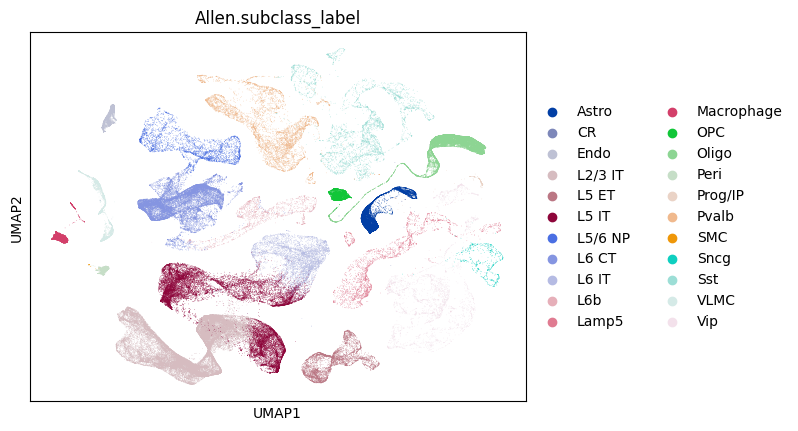

In [26]:
sc.pl.umap(mouse, color='Allen.subclass_label')

In [18]:
mouse.X.todense()

matrix([[1.8502157 , 0.        , 0.        , ..., 1.3030746 , 0.        ,
         0.        ],
        [1.3963279 , 0.        , 0.        , ..., 1.6201367 , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.514456  , 0.        , 0.28995258, ..., 1.6166854 , 0.        ,
         0.        ],
        [1.1162484 , 0.        , 0.        , ..., 0.41432205, 0.        ,
         0.        ],
        [0.73116875, 0.        , 0.        , ..., 1.1489931 , 0.        ,
         0.43097275]], dtype=float32)

In [ ]:
## this is log1p normalized data

In [27]:
mouse.raw.X

<159738x30639 sparse matrix of type '<class 'numpy.float32'>'
	with 636172042 stored elements in Compressed Sparse Row format>

In [25]:
mouse.raw.X.max()

7823.0

In [24]:
mouse.raw.X.min()

0.0

In [28]:
mouse_raw_counts = anndata.AnnData(X = mouse.raw.X, obs = mouse.obs, var = mouse.var)

In [29]:
mouse_raw_counts.X.max()

7823.0

In [30]:
mouse_raw_counts.write("mouse_raw_counts_from_cellxgene.h5ad", compression = 'gzip')

In [32]:
## a rough check if annotationa are correct

In [33]:
def scanpy_preprocess(input_ad, anno_col):
    
    input_ad.raw = input_ad.copy()
    
    sc.pp.normalize_total(input_ad, target_sum=1e4)
    sc.pp.log1p(input_ad)
    sc.pp.highly_variable_genes(input_ad)
    sc.pl.highly_variable_genes(input_ad)
    
    sc.pp.scale(input_ad, max_value=10)
    sc.tl.pca(input_ad, svd_solver='arpack', use_highly_variable=True)
    
    sc.pl.pca_variance_ratio(input_ad, log=True, n_pcs=50)
    
    sc.pp.neighbors(input_ad, n_neighbors=10, n_pcs=50)
    
    sc.tl.umap(input_ad, min_dist=0.3)
    
    sc.pl.umap(input_ad, color = [anno_col], ncols=1)

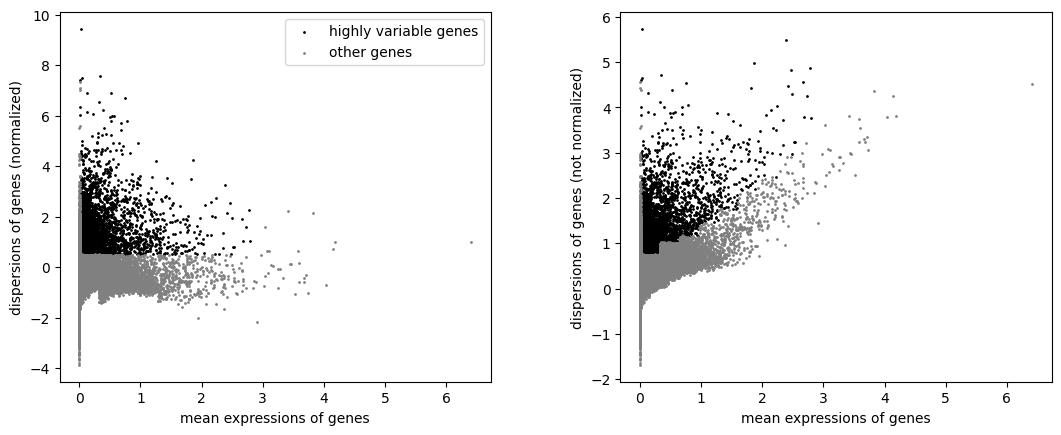

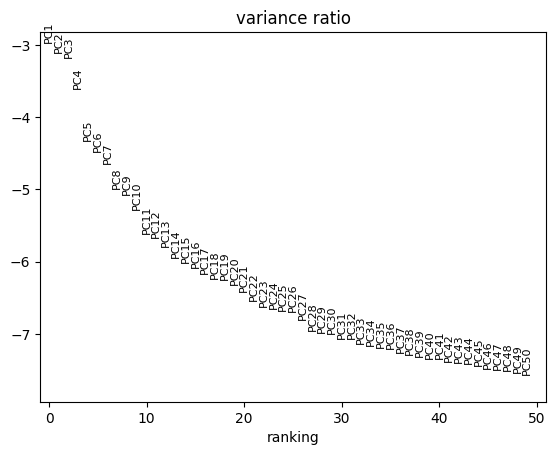

/nfs/research/irene/anaelle/miniconda3/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/nfs/research/irene/anaelle/miniconda3/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/nfs/research/irene/anaelle/miniconda3/lib/python3.10/site-pac

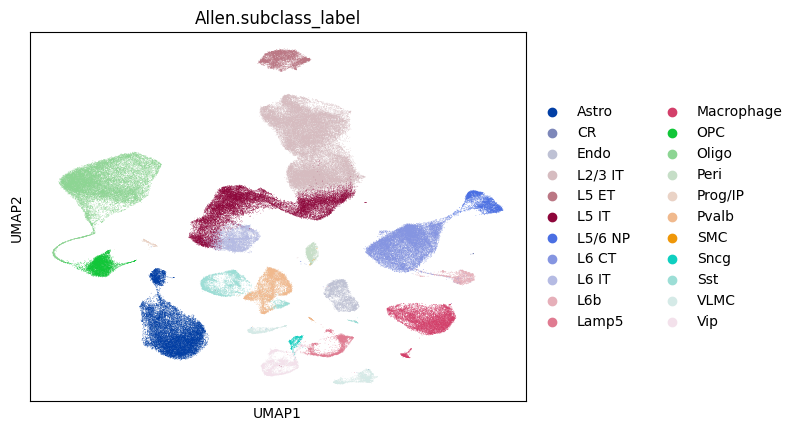

In [34]:
scanpy_preprocess(mouse_raw_counts, 'Allen.subclass_label')

In [ ]:
## it looks fine!!

In [39]:
mouse_raw_counts.var_names

Index(['ENSMUSG00000029422', 'ENSMUSG00000114536', 'ENSMUSG00000049036',
       'ENSMUSG00000029577', 'ENSMUSG00000040746', 'ENSMUSG00000020590',
       'ENSMUSG00000096963', 'ENSMUSG00000030263', 'ENSMUSG00000038914',
       'ENSMUSG00000098447',
       ...
       'ENSMUSG00000101706', 'ENSMUSG00000073052', 'ENSMUSG00000113410',
       'ENSMUSG00000102368', 'ENSMUSG00000021033', 'ENSMUSG00000100416',
       'ENSMUSG00000096169', 'ENSMUSG00000030657', 'ENSMUSG00000037924',
       'ENSMUSG00000040693'],
      dtype='object', name='feature_id', length=30639)

In [40]:
mouse_raw_counts.var

,feature_is_filtered,feature_name,feature_reference,feature_biotype,highly_variable,means,dispersions,dispersions_norm,mean,std
feature_id,,,,,,,,,,
ENSMUSG00000029422,False,Rsrc2,NCBITaxon:10090,gene,False,0.850093,0.630134,-0.485710,0.675323,0.571959
ENSMUSG00000114536,False,Gm48837,NCBITaxon:10090,gene,False,0.010770,0.030604,-0.802685,0.007630,0.069569
ENSMUSG00000049036,False,Tmem121,NCBITaxon:10090,gene,False,0.162300,0.273526,-0.366166,0.115837,0.268371
ENSMUSG00000029577,False,Ube3b,NCBITaxon:10090,gene,False,0.257156,0.448379,-0.051963,0.182779,0.339656
ENSMUSG00000040746,False,Rnf167,NCBITaxon:10090,gene,False,0.224495,0.676620,0.358176,0.149784,0.329844
...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000100416,False,Gm29501,NCBITaxon:10090,gene,False,0.000075,0.820589,0.616882,0.000040,0.006732
ENSMUSG00000096169,False,Olfr1564,NCBITaxon:10090,gene,False,0.040284,-0.289836,-1.378502,0.031001,0.123620
ENSMUSG00000030657,False,Xylt1,NCBITaxon:10090,gene,True,1.316888,2.334842,1.332110,0.904544,0.818108


In [42]:
sum(mouse_raw_counts.var['feature_name'] == 'A4galt')

1

In [50]:
sum(mouse_raw_counts.var.index == 'ENSMUSG00000047878')

1